<img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">

---

# 4- Object recognizer

Import necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

## Deep network

Let's create a deep network which will learn our emotions and then will try to predict them.

In [2]:
from keras.applications import inception_v3

model = inception_v3.InceptionV3(weights='imagenet')

model.summary()

# we won't train that already trained model!

Using TensorFlow backend.
/Users/santiagobasulto/.virtualenvs/keras-wine-model/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


96116736/96112376 [==============================] - 156s 2us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________

### Predict using our model

Finally test our model predictions live with our camera:

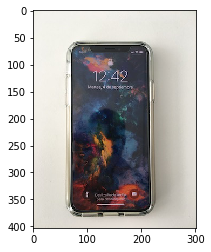

In [3]:
from PIL import Image

image = Image.open('./data/phone.jpg')

plt.imshow(image)

In [4]:
from keras import preprocessing

img = preprocessing.image.load_img('./data/phone.jpg', target_size=(299, 299))
x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
predictions = model.predict(x)
labels = inception_v3.decode_predictions(predictions, top=3)[0]

labels

[('n02992529', 'cellular_telephone', 0.7631687),
 ('n03584254', 'iPod', 0.12571256),
 ('n03908618', 'pencil_box', 0.015993062)]

In [ ]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize to 224*224
    roi = cv2.resize(roi, (399, 399))
    roi = inception_v3.preprocess_input(roi)

    # predict!
    roi2 = np.array([cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)])

    predictions = model.predict(roi2)

    labels = inception_v3.decode_predictions(predictions, top=3)[0]

    # add text
    label_1 = '{} - {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_1, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 150), 2)

    # add text
    label_2 = '{} - {}%'.format(labels[1][1], int(labels[1][2]*100))
    cv2.putText(frame, label_2, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 240), 2)

    # add text
    label_3 = '{} - {}%'.format(labels[2][1], int(labels[2][2]*100))
    cv2.putText(frame, label_3, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 20, 240), 2)

    # show the frame
    cv2.imshow("Real Time object detection", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">
<a href="https://rmotr.com" target="_blank">rmotr.com</a>